In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stumbleupon/test.tsv
/kaggle/input/stumbleupon/train.tsv
/kaggle/input/stumbleupon/sampleSubmission.csv
/kaggle/input/stumbleupon/raw_content.zip


In [7]:
# taking all columns of training set only for data exploration
train=pd.read_csv('/kaggle/input/stumbleupon/train.tsv',sep='\t')

# taking boilerplate column as an input for the model beacuse only this column contain lot of high quality text data useful for our nlp task
test=pd.read_csv('/kaggle/input/stumbleupon/test.tsv',sep='\t')

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
test.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,...,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,...,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,...,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,...,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,...,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341


In [10]:
train.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [12]:
train=train.dropna()

In [13]:
train.reset_index(inplace=True)
train.shape

(7395, 28)

<AxesSubplot:xlabel='label', ylabel='count'>

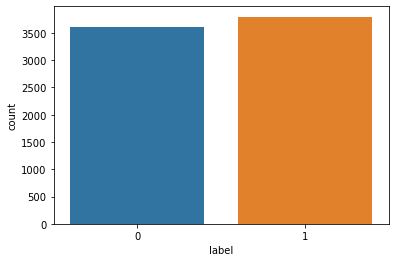

In [14]:
sns.countplot(x=train['label'])

In [15]:
train['avglinksize'].value_counts()

2.000000      58
0.000000      41
1.000000      37
2.333333      34
2.500000      29
              ..
2.860000       1
2.142132       1
2.393162       1
2.744361       1
119.000000     1
Name: avglinksize, Length: 5710, dtype: int64

In [16]:
train['alchemy_category_score'].value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.562996        1
0.665088        1
0.596763        1
0.487583        1
0.903633        1
Name: alchemy_category_score, Length: 4806, dtype: int64

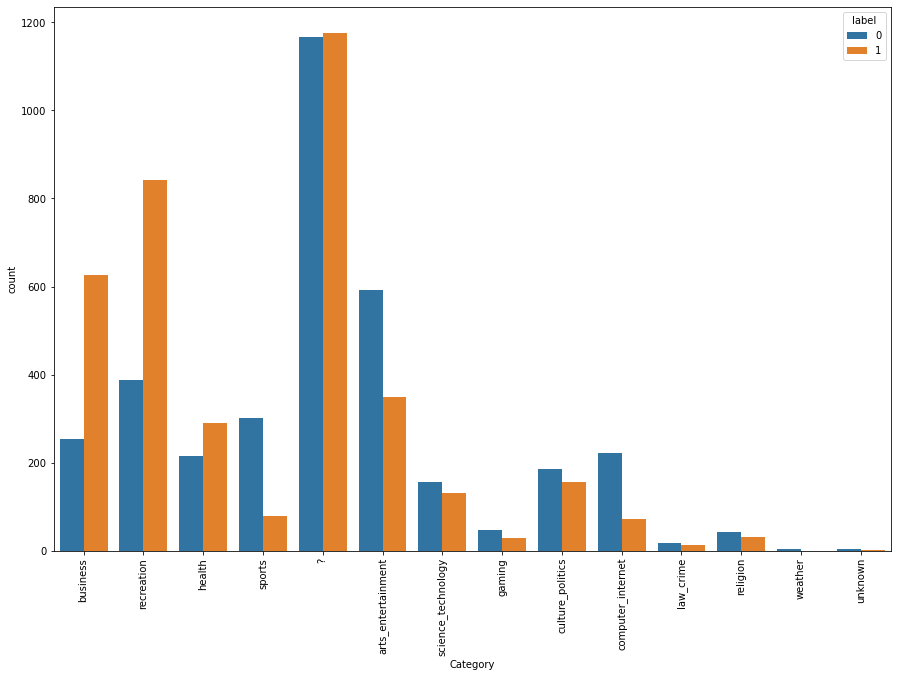

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x=train['alchemy_category'],hue=train['label']);
plt.xlabel('Category');
plt.xticks(rotation=90);

In [19]:
import json

title=[]
body=[]
label=[]
alchemy_category_score=[]
urlid=[]
url=[]

for i in range(7395):
    X=json.loads(train["boilerplate"][i])
    if 'title' in X.keys() and 'body' in X.keys() and 'url' in X.keys():
        title.append(X.get('title'))
        body.append(X.get('body'))
        url.append(X.get('url'))
        label.append(train['label'][i])
        alchemy_category_score.append(train['alchemy_category_score'][i])
        urlid.append(train['urlid'][i])
    

dict_df = {'urlid':urlid,'title':title,'body':body,'url':url,'alchemy_category_score':alchemy_category_score,'label':label}
df_data = pd.DataFrame.from_dict(dict_df)



In [ ]:
#joining  title and body on content
data_df=[]
for row in range(0,len(data_df.index)):
    data_df.append(' '.join(str(x) for x in df_data.iloc[row,1:3]))
data_df[0] 




In [20]:
data_df=df_data

In [21]:
data_df=data_df.dropna()
data_df.reset_index(inplace=True,drop=True)

In [22]:
data_df['title'].isnull().value_counts()

False    7267
Name: title, dtype: int64

In [23]:
import json

title=[]
body=[]
alchemy_category_score=[]
urlid=[]
url=[]

for i in range(len(test)):
    X=json.loads(test["boilerplate"][i])
    if 'title' in X.keys() and 'body' in X.keys() and 'url'in X.keys():
        title.append(X.get('title'))
        body.append(X.get('body'))
        url.append(X.get('url'))
        alchemy_category_score.append(test['alchemy_category_score'][i])
        urlid.append(test['urlid'][i])
    

dict_df = {'urlid':urlid,'title':title,'body':body,'url':url,'alchemy_category_score':alchemy_category_score}
df_test = pd.DataFrame.from_dict(dict_df)

df_test=df_test.dropna()
df_test.reset_index(inplace=True)

In [24]:
X=data_df.drop('label',axis=1).values### independent features
y=data_df['label'].values###dependent features

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [26]:
data_df.columns

Index(['urlid', 'title', 'body', 'url', 'alchemy_category_score', 'label'], dtype='object')

In [27]:

from nltk.stem import PorterStemmer
import re
ps=PorterStemmer()
def process_title(title):
    new_title = title.lower()
    new_title = re.sub(r'\$[^\s]+', 'dollar', new_title)
    new_title = re.sub(r'[^a-z0-9\s]', '', new_title)
    new_title = re.sub(r'[0-9]+', 'number', new_title)
    new_title = new_title.split(" ")
    new_title = list(map(lambda x: ps.stem(x), new_title))
    new_title = list(map(lambda x: x.strip(), new_title))
    if '' in new_title:
        new_title.remove('')
    return new_title
titles = data_df['title'].apply(process_title)


In [ ]:
titles


In [28]:
vocabulary = set()
for title in titles:
    for word in title:
        if word not in vocabulary:
            vocabulary.add(word)

In [29]:
vocab_length = len(vocabulary)

In [30]:
max_seq_length = 0

for title in titles:
    if len(title) > max_seq_length:
        max_seq_length = len(title)


In [31]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

Vocab length: 8562
Max sequence length: 74


In [34]:

from nltk.stem import PorterStemmer
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [35]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(titles)

In [36]:
sequences = tokenizer.texts_to_sequences(titles)

In [ ]:
sequences

In [37]:
word_index = tokenizer.word_index


In [ ]:
word_index

In [38]:

embedded_docs = pad_sequences(sequences, maxlen=max_seq_length)

In [ ]:
embedded_docs.dtype

In [41]:
for i in range(0, len(data_df['alchemy_category_score'])):
    if(data_df['alchemy_category_score'][i]=='?'):
        data_df['alchemy_category_score'][i]=str(0)
        


In [42]:
data_df['alchemy_category_score'].value_counts()

0            2260
0.85           82
0.0784091      39
0.849999       12
0.535009       10
             ... 
0.588645        1
0.184895        1
0.724262        1
0.332653        1
0.903633        1
Name: alchemy_category_score, Length: 4763, dtype: int64

In [ ]:
data_df['alchemy_category_score'].dtype

In [ ]:
pd.to_numeric(data_df['alchemy_category_score'], errors='coerce')

In [45]:
data_df['alchemy_category_score'] = data_df['alchemy_category_score'].apply(pd.to_numeric, errors='coerce')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
train['linkwordscore'].dtype

dtype('int64')

In [100]:
data_df['alchemy_category_score'].dtype

dtype('float64')

In [40]:
y_train.dtype

dtype('int64')

In [46]:

import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)



#splitting onto train &test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,z_train,z_test = train_test_split(X_final, y_final, data_df['alchemy_category_score'],test_size=0.33, random_state=42)
#Model Training

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,z_train.shape,z_test.shape)

(4868, 74) (2399, 74) (4868,) (2399,) (4868,) (2399,)


In [105]:
z_train.dtype

dtype('float64')

In [59]:
from keras.layers import concatenate
from keras.layers import Dropout
nlp_input = tf.keras.Input(shape=(max_seq_length,),name='nlp_input')
meta_input =tf.keras. Input(shape=(1,),name='meta_input')

emb = Embedding(output_dim=64, input_dim=vocab_length, input_length=max_seq_length)(nlp_input)
nlp_out = (LSTM(18, dropout=0.4, recurrent_dropout=0.5))(emb)
x = concatenate([nlp_out, meta_input])
x = Dense(20, activation='relu')(x)
x = Dropout(.4)(x)
x = Dense(20, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model =tf.keras.Model(inputs=[nlp_input , meta_input], outputs=[x])


In [60]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy'
    ]
)


In [61]:


history = model.fit({'nlp_input':X_train,'meta_input':z_train},
    
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=10
)


Epoch 1/10
122/122 [==============================] - 42s 326ms/step - loss: 0.6807 - accuracy: 0.5681 - val_loss: 0.5150 - val_accuracy: 0.7485
Epoch 2/10
122/122 [==============================] - 40s 324ms/step - loss: 0.4670 - accuracy: 0.7897 - val_loss: 0.5331 - val_accuracy: 0.7587
Epoch 3/10
122/122 [==============================] - 40s 324ms/step - loss: 0.3344 - accuracy: 0.8653 - val_loss: 0.5717 - val_accuracy: 0.7454
Epoch 4/10
122/122 [==============================] - 40s 328ms/step - loss: 0.2298 - accuracy: 0.9079 - val_loss: 0.6826 - val_accuracy: 0.7331
Epoch 5/10
122/122 [==============================] - 39s 321ms/step - loss: 0.1811 - accuracy: 0.9280 - val_loss: 0.8459 - val_accuracy: 0.7218
Epoch 6/10
122/122 [==============================] - 40s 326ms/step - loss: 0.1460 - accuracy: 0.9368 - val_loss: 0.9529 - val_accuracy: 0.7166
Epoch 7/10
122/122 [==============================] - 40s 332ms/step - loss: 0.1459 - accuracy: 0.9379 - val_loss: 1.0612 - val_ac

In [62]:
y_pred=model.predict([X_test,z_test])


In [63]:
j=0
for i in y_pred:
    if(i>.5):
        y_pred[j]=1
        j=j+1
    else:
        y_pred[j]=0
        j=j+1

In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[727, 448],
       [250, 974]])

In [65]:


from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7090454355981659

In [66]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.795751633986928

In [67]:
#1. only on text data
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU

embedding_vector_features=100
model=Sequential()
model.add(Embedding(vocab_length,embedding_vector_features,input_length=max_seq_length))
model.add(Dropout(0.4))
model.add(LSTM(16,dropout=.3,recurrent_dropout=.3))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 74, 100)           856200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                7488      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 863,705
Trainable params: 863,705
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
#2.
len(embedded_docs),y.shape


import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)


X_final.shape,y_final.shape
#splitting onto train &test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
#Model Training

### Finally Training
model.fit(X_train,y_train,validation_split=0.25,epochs=10,batch_size=32)
y_pred=model.predict_classes(X_test)


Epoch 1/10
115/115 [==============================] - 40s 325ms/step - loss: 0.6785 - accuracy: 0.5534 - val_loss: 0.5738 - val_accuracy: 0.7058
Epoch 2/10
115/115 [==============================] - 37s 326ms/step - loss: 0.5222 - accuracy: 0.7848 - val_loss: 0.5078 - val_accuracy: 0.7486
Epoch 3/10
115/115 [==============================] - 38s 329ms/step - loss: 0.3858 - accuracy: 0.8505 - val_loss: 0.5243 - val_accuracy: 0.7502
Epoch 4/10
115/115 [==============================] - 39s 338ms/step - loss: 0.2981 - accuracy: 0.8951 - val_loss: 0.5902 - val_accuracy: 0.7371
Epoch 5/10
115/115 [==============================] - 37s 320ms/step - loss: 0.2425 - accuracy: 0.9031 - val_loss: 0.6478 - val_accuracy: 0.7297
Epoch 6/10
115/115 [==============================] - 37s 322ms/step - loss: 0.1954 - accuracy: 0.9281 - val_loss: 0.7414 - val_accuracy: 0.7239
Epoch 7/10
115/115 [==============================] - 38s 327ms/step - loss: 0.1517 - accuracy: 0.9380 - val_loss: 0.7847 - val_ac

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7340558566069195

In [70]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)



array([[792, 383],
       [255, 969]])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7340558566069195